In [2]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureNormal_Ek.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [4]:
df = data

In [5]:
df.shape

(1440, 196)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [7]:
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,14.502933,15.547618,17.645388,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,15.213718,15.513745,17.582760,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,14.972030,15.697508,17.437520,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,15.242136,15.597314,16.492804,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,14.636722,16.023571,17.020093,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,16.391113,18.151034,17.573820,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,16.270073,17.091367,17.932740,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,16.128660,16.947312,18.503842,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,16.307834,17.859030,17.360766,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220


In [9]:
y

0       1
1       1
2       1
3       1
4       2
       ..
1435    8
1436    8
1437    8
1438    8
1439    8
Name: 0.2, Length: 1440, dtype: int64

In [10]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

In [11]:
X.shape, y.shape

((1440, 193), (1440,))

In [12]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [13]:
y1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
X.shape, y1.shape

((1440, 193), (1440, 8))

In [15]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [16]:
X2.shape, y2.shape

((1440, 193), (1440,))

In [17]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [18]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [19]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-521.547302,77.956268,-19.427402,24.423990,-2.413774,-4.131415,-20.575113,-0.134967,-10.341573,0.376268,...,15.013307,16.916615,16.888602,30.432152,-0.020072,0.002151,-0.054975,-0.020576,-0.007031,-0.012101
1,-694.125427,89.352890,17.187904,34.136402,11.057952,19.835867,-1.449472,7.352085,-7.952507,7.914078,...,14.848684,16.186144,15.988606,32.257648,-0.025636,-0.007304,0.002849,-0.087648,0.018231,0.016679
2,-540.653687,64.695663,-12.093176,13.139149,-0.056961,-3.632231,-17.010035,-13.802145,-10.112307,1.112248,...,18.009618,18.633791,19.189384,29.731008,0.008775,0.009064,-0.000060,0.042931,-0.006792,0.007978
3,-635.038208,59.242809,-14.267573,14.177912,-10.723826,0.717458,-9.246791,-6.918327,-6.739667,-1.037649,...,16.948005,18.004542,16.561840,30.620014,-0.106044,0.033797,-0.075319,-0.052065,0.010273,0.003332
4,-518.686218,60.419811,1.542669,15.409612,-3.760008,4.728145,-3.595308,3.629540,-10.236009,0.922400,...,15.830307,17.281869,16.867927,31.741905,-0.019200,0.034101,0.003850,-0.049982,-0.031635,-0.005829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-619.984009,82.548264,-5.020515,23.687586,-7.415154,18.679161,-6.487446,-1.330336,-13.255409,3.743963,...,16.487207,17.587963,16.703692,31.808119,-0.000666,0.018995,-0.058539,0.018714,0.008222,-0.014984
1436,-409.385651,14.292880,-12.104706,9.623018,-33.162331,6.402128,-18.303886,-10.767341,-13.102248,-0.215422,...,18.456016,20.213013,18.576479,32.108141,-0.050081,-0.015172,0.003873,-0.038299,0.002588,-0.012119
1437,-413.710876,31.911446,-22.527260,2.865191,-12.242773,-9.204301,-14.855512,-9.888793,-23.490492,0.589525,...,18.166894,19.467459,19.658358,33.049526,-0.064942,0.005416,0.000700,-0.013876,0.025157,-0.012493
1438,-593.926514,80.987335,-7.736116,21.117559,8.416611,-0.715257,-1.642369,1.938591,-7.679686,4.232740,...,15.803106,16.175938,18.370403,30.476102,-0.011916,0.039719,-0.040311,-0.064398,0.032557,0.013286


In [20]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=1440
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    #print(a[i])

    model_name = 'Model_'+str(i)
    savedir='RAVDESS_gender_both'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Training set: 4 folds (80%)
    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    # Testing set: 1 fold (20%)
    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]


    overlap_indices = np.intersect1d(split4, split1)
    if len(overlap_indices) > 0:
        print(f"⚠️ Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"✅ No overlap in fold {i}.")

    print(f"Fold {i} -> Train samples: {len(split4)}, Test samples: {len(split1)}")

    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs_train = y.iloc[split4]
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print(fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00005, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

✅ No overlap in fold 0.
Fold 0 -> Train samples: 1152, Test samples: 288
[  0   2   1  24  47  40 124 132  74 157 156 173 154 143 166 148 180 144
 142 122 106  96  55 100  98  89 126 130 168 179 186 187 190 189 181 182
 174 188 177 178 145 151 158 141 125 121 155 162 150 164 153 135 169 172
 159 137 183 165 128 112  93  90  66  57  54  34  97 136 129 139 163 175
 171 110  25   3  20  13  79  64  87 138 140 120 149 131  84  45  86  94
  80 115 104  69  92  95 147 146 123  68  99 119 101 107  72  75 111 160
  81  63 105 116 118  71 161 170  78  70 114  85 108 134  32  21  41]
0
Epoch 1/700
36/36 [==============================] - 7s 128ms/step - loss: 2.2408 - accuracy: 0.1710 - val_loss: 2.1657 - val_accuracy: 0.1667
Epoch 2/700
36/36 [==============================] - 4s 101ms/step - loss: 2.0182 - accuracy: 0.2153 - val_loss: 2.0178 - val_accuracy: 0.2153
Epoch 3/700
36/36 [==============================] - 3s 97ms/step - loss: 1.9495 - accuracy: 0.2431 - val_loss: 1.9385 - val_accura

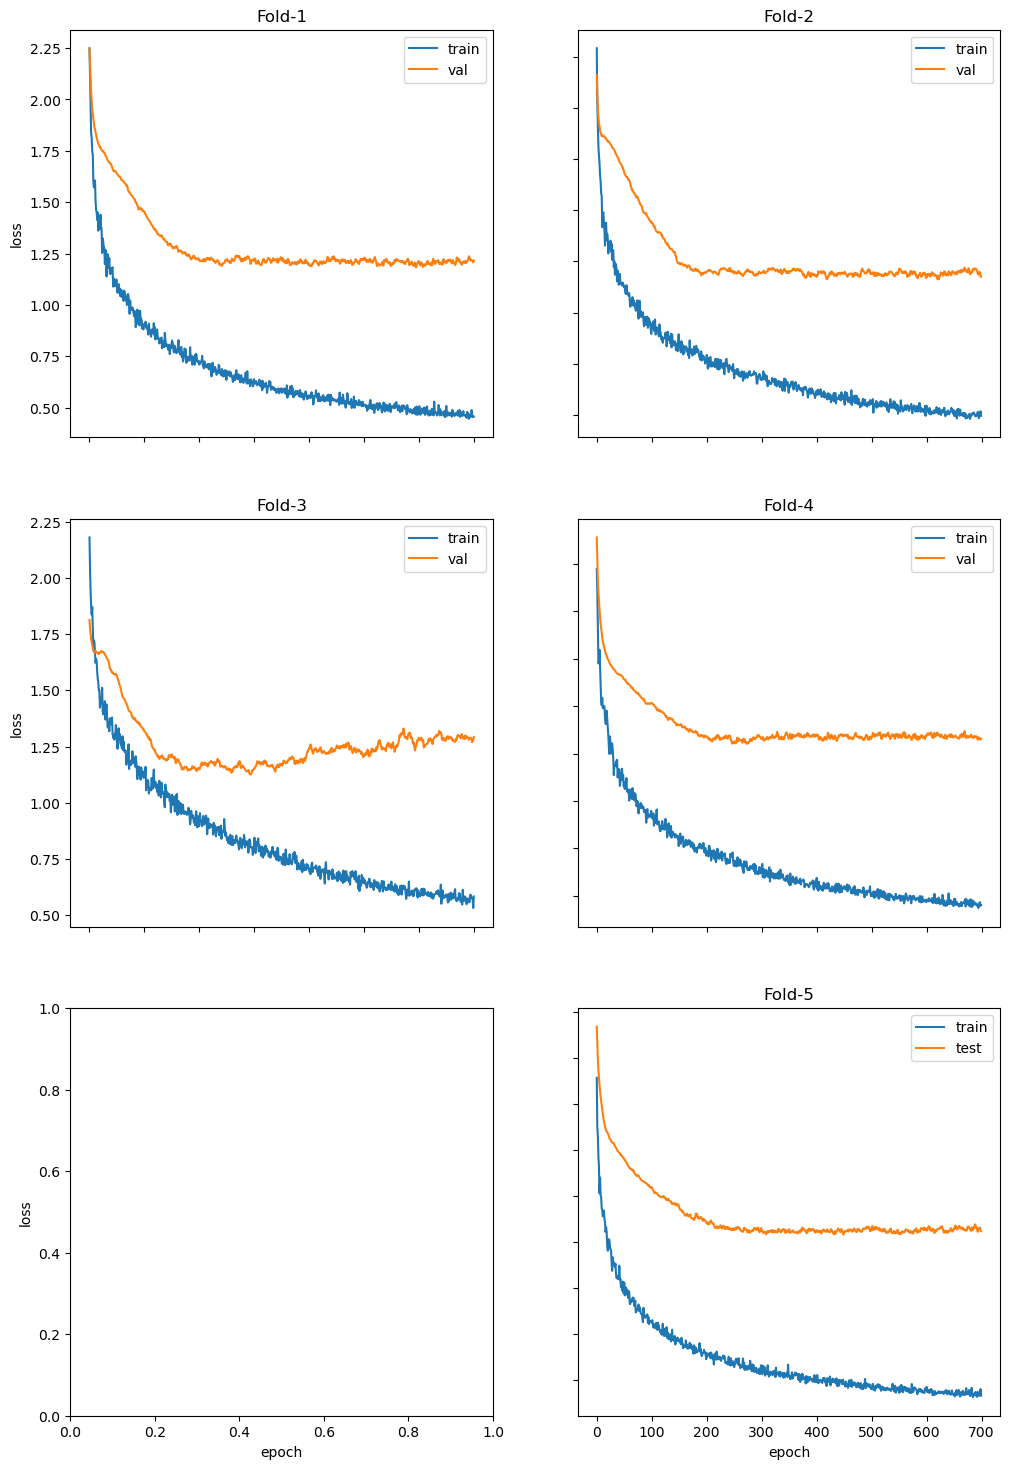

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [ ]:
### Model yükleme, gereksizse yapma

In [1]:
# loading json and creating model
from keras.models import model_from_json
savedir='RAVDESS_gender_both'
m='Model_4'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loaded model from disk


Testing data from the same pool

In [31]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X4.npy')
yloaded=np.load(savedir+'/y4.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 55.21%


In [32]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

9/9 [==============================] - 0s 22ms/step
(288, 8)
288


array([[13,  8,  1,  2,  0,  0,  4,  1],
       [ 1, 23,  0,  6,  0,  0,  3,  0],
       [ 0,  0, 18,  8,  4,  5,  4,  3],
       [ 3,  3,  0, 17,  1,  5,  7,  1],
       [ 0,  1,  1,  3, 28,  1,  4,  0],
       [ 1,  2,  0, 10,  5, 19,  3,  2],
       [ 1,  0,  3,  5,  4,  0, 19,  3],
       [ 0,  0,  3,  1,  2,  1,  3, 22]], dtype=int64)

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 8):
    sumik = np.sum(array[it])
    for it2 in range(0, 8):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[44.8 27.6  3.4  6.9  0.   0.  13.8  3.4]
 [ 3.  69.7  0.  18.2  0.   0.   9.1  0. ]
 [ 0.   0.  42.9 19.   9.5 11.9  9.5  7.1]
 [ 8.1  8.1  0.  45.9  2.7 13.5 18.9  2.7]
 [ 0.   2.6  2.6  7.9 73.7  2.6 10.5  0. ]
 [ 2.4  4.8  0.  23.8 11.9 45.2  7.1  4.8]
 [ 2.9  0.   8.6 14.3 11.4  0.  54.3  8.6]
 [ 0.   0.   9.4  3.1  6.2  3.1  9.4 68.8]]


           angry  calm  disgust  fearful  happy  neutral   sad  surprised
angry       44.8  27.6      3.4      6.9    0.0      0.0  13.8        3.4
calm         3.0  69.7      0.0     18.2    0.0      0.0   9.1        0.0
disgust      0.0   0.0     42.9     19.0    9.5     11.9   9.5        7.1
fearful      8.1   8.1      0.0     45.9    2.7     13.5  18.9        2.7
happy        0.0   2.6      2.6      7.9   73.7      2.6  10.5        0.0
neutral      2.4   4.8      0.0     23.8   11.9     45.2   7.1        4.8
sad          2.9   0.0      8.6     14.3   11.4      0.0  54.3        8.6
surprised    0.0   0.0      9.4      3.1    6.2      3.1   9.4       68.8



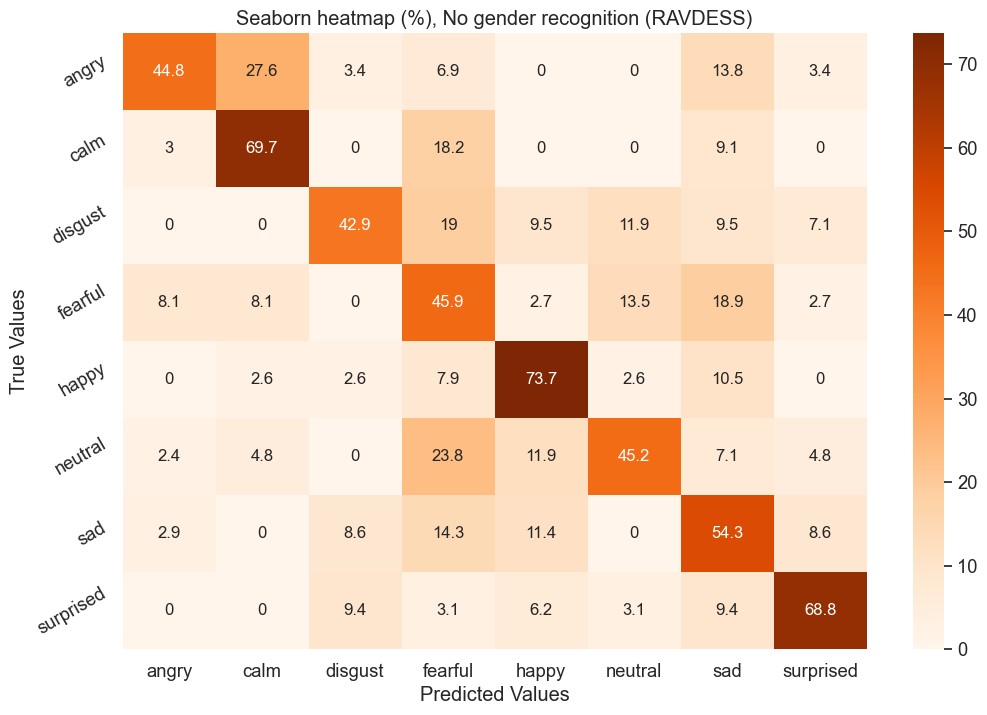

In [37]:
listik = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), No gender recognition (RAVDESS)')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()